<a href="https://colab.research.google.com/github/derektorquette/pln-com-deep-learning-ia-expert/blob/main/sumarizacao_algoritmo_de_Luhn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sumarização de textos com o Algoritmo de Luhn

- Seleciona palavras de maior importância baseado na frequência
- Pesos maiores são associados à palavras no início do documento
- https://courses.ischool.berkeley.edu/i256/f06/papers/luhn58.pdf

## Preparação do texto de exemplo

In [ ]:
import re
import nltk
import string
import heapq # estrutura de dados para buscar a sentença com a maior nota

In [ ]:
nltk.download('punkt')

In [ ]:
nltk.download('stopwords')

In [ ]:
texto_original = """A inteligência artificial é a inteligência similar à humana máquinas.
                    Definem como o estudo de agente artificial com inteligência.
                    Ciência e engenharia de produzir máquinas com inteligência.
                    Resolver problemas e possuir inteligência.
                    Relacionada ao comportamento inteligente.
                    Construção de máquinas para raciocinar.
                    Aprender com os erros e acertos.
                    Inteligência artificial é raciocinar nas situações do cotidiano."""
texto_original = re.sub(r'\s+', ' ', texto_original)
texto_original

'A inteligência artificial é a inteligência similar à humana máquinas. Definem como o estudo de agente artificial com inteligência. Ciência e engenharia de produzir máquinas com inteligência. Resolver problemas e possuir inteligência. Relacionada ao comportamento inteligente. Construção de máquinas para raciocinar. Aprender com os erros e acertos. Inteligência artificial é raciocinar nas situações do cotidiano.'

In [ ]:
stopwords = nltk.corpus.stopwords.words('portuguese')
print(stopwords)

In [ ]:
stopwords.append('ser')
stopwords.append('além')

In [ ]:
print(stopwords)

In [ ]:
def preprocessamento(texto):
  texto_formatado = texto.lower()
  tokens = []
  for token in nltk.word_tokenize(texto_formatado):
    tokens.append(token)

  tokens = [palavra for palavra in tokens if palavra not in stopwords and palavra not in string.punctuation]
  texto_formatado = ' '.join([str(elemento) for elemento in tokens if not elemento.isdigit()])

  return texto_formatado

## Função para calcular a nota das sentenças

In [ ]:
teste = ['a', 'b', 'c']
teste.index('a')

In [ ]:
def calcula_nota_sentenca(sentencas, palavras_importantes, distancia):
  notas = []
  indice_sentenca = 0

  for sentenca in [nltk.word_tokenize(sentenca.lower()) for sentenca in sentencas]:
    #print('---------------')
    #print(sentenca)
    indice_palavra = []
    for palavra in palavras_importantes:
      #print(palavra)
      try:
        indice_palavra.append(sentenca.index(palavra))
      except ValueError:
        pass

    indice_palavra.sort()
    #print(indice_palavra)

    if len(indice_palavra) == 0:
      continue

    # [0, 1, 3, 5]
    lista_grupos = []
    grupo = [indice_palavra[0]]
    i = 1
    while i < len(indice_palavra):
      if indice_palavra[i] - indice_palavra[i - 1] < distancia:
        grupo.append(indice_palavra[i])
        #print('grupo: ', grupo)
      else:
        lista_grupos.append(grupo[:])
        grupo = [indice_palavra[i]]
        #print('grupo: ', grupo)
      i += 1
    lista_grupos.append(grupo)
    #print('todos os grupos: ', lista_grupos)

    nota_maxima_grupo = 0
    for g in lista_grupos:
      #print(g)
      palavras_importantes_no_grupo = len(g)
      total_palavras_no_grupo = g[-1] - g[0] + 1
      #print('palavras importantes no grupo ', palavras_importantes_no_grupo)
      #print('total de palavras ', total_palavras_no_grupo)
      nota = 1.0 * palavras_importantes_no_grupo**2 / total_palavras_no_grupo
      #print('nota grupo', nota)

      if nota > nota_maxima_grupo:
        nota_maxima_grupo = nota

    notas.append((nota_maxima_grupo, indice_sentenca))
    indice_sentenca += 1

  #print('notas finais das senteças', notas)
  return notas

In [ ]:
teste = [0, 1, 3, 4, 6, 9]
teste[-1], teste[0] + 1

(9, 1)

## Função para sumarizar os textos

In [ ]:
def sumarizar(texto, top_n_palavras, distancia, quantidade_sentencas):
  sentencas_originais = [sentenca for sentenca in nltk.sent_tokenize(texto)]
  #print(sentencas_originais)
  sentencas_formatadas = [preprocessamento(sentenca_original) for sentenca_original in sentencas_originais]
  #print(sentencas_formatadas)
  palavras = [palavra for sentenca in sentencas_formatadas for palavra in nltk.word_tokenize(sentenca)]
  #print(palavras)
  frequencia = nltk.FreqDist(palavras)
  #return frequencia
  top_n_palavras = [palavra[0] for palavra in frequencia.most_common(top_n_palavras)]
  #print(top_n_palavras)
  notas_sentencas = calcula_nota_sentenca(sentencas_formatadas, top_n_palavras, distancia)
  #print(notas_sentencas)
  melhores_sentencas = heapq.nlargest(quantidade_sentencas, notas_sentencas)
  #print(melhores_sentencas)
  melhores_sentencas = [sentencas_originais[i] for (nota, i) in melhores_sentencas]
  #print(melhores_sentencas)
  #print(sentencas_originais)
  return sentencas_originais, melhores_sentencas, notas_sentencas

In [28]:
sentencas_originais, melhores_sentencas, notas_sentencas = sumarizar(texto_original, 5, 3, 3) # podemos modificar esses parâmetros

In [29]:
sentencas_originais

['A inteligência artificial é a inteligência similar à humana máquinas.',
 'Definem como o estudo de agente artificial com inteligência.',
 'Ciência e engenharia de produzir máquinas com inteligência.',
 'Resolver problemas e possuir inteligência.',
 'Relacionada ao comportamento inteligente.',
 'Construção de máquinas para raciocinar.',
 'Aprender com os erros e acertos.',
 'Inteligência artificial é raciocinar nas situações do cotidiano.']

In [30]:
melhores_sentencas

['Construção de máquinas para raciocinar.',
 'A inteligência artificial é a inteligência similar à humana máquinas.',
 'Relacionada ao comportamento inteligente.']

In [32]:
notas_sentencas # sentenças que não possuem 'palavras importantes' são descartadas

[(2.6666666666666665, 0), (2.0, 1), (2.0, 2), (1.0, 3), (2.0, 4), (3.0, 5)]

## Visualização do resumo

In [25]:
def visualiza_resumo(titulo, lista_sentencas, melhores_sentencas):
  from IPython.core.display import HTML
  texto = ''

  display(HTML(f'<h1>Resumo do texto - {titulo}</h1>'))
  for i in lista_sentencas:
    if i in melhores_sentencas:
      texto += str(i).replace(i, f"<mark>{i}</mark>")
    else:
      texto += i
  display(HTML(f""" {texto} """))

In [26]:
visualiza_resumo('Teste', sentencas_originais, melhores_sentencas)

## Extração de texto da internet

In [ ]:
!pip install goose3

In [34]:
from goose3 import Goose

In [35]:
g = Goose()
url = 'https://iaexpert.academy/2020/11/09/ia-preve-resultado-das-eleicoes-americanas/'
artigo = g.extract(url)

In [ ]:
artigo.cleaned_text

In [38]:
sentencas_originais, melhores_sentencas, notas_sentencas = sumarizar(artigo.cleaned_text, 300, 10, 5)

In [ ]:
sentencas_originais

In [ ]:
melhores_sentencas

In [ ]:
notas_sentencas

In [42]:
visualiza_resumo(artigo.title, sentencas_originais, melhores_sentencas)

## Leitura de artigos de feed de notícias (RSS)

In [ ]:
!pip install feedparser

In [44]:
import feedparser

In [45]:
from bs4 import BeautifulSoup
import os
import json

In [46]:
url = 'https://iaexpert.academy/feed/'
feed = feedparser.parse(url)

In [ ]:
feed.entries

In [ ]:
for e in feed.entries:
  print(e.title)
  print(e.links[0].href) # acessar o link
  print(e.content[0].value) # acessar o conteúdo

In [51]:
e.content[0].value

'<p>A corrida das IAs generativas continua aquecida. Na semana passada, o Google anunciou o lançamento do Imagem 2, sua nova versão de IA para geração de imagens a partir de texto. Desenvolvido pela DeepMind, o sistema representa um avanço significativo no campo da geração de texto para imagem.</p>\n\n\n\n<p>A nova versão do Imagen se baseia em seu predecessor, oferecendo diversas melhorias importantes. Notavelmente, ele fornece imagens de qualidade consideravelmente superior, caracterizadas por fotorrealismo, alta resolução e apelo estético. Esse aprimoramento decorre de uma arquitetura aprimorada do modelo de difusão e de um conjunto de dados de treinamento cuidadosamente selecionado. Além disso, o Imagen 2 oferece aos usuários maior controle sobre as imagens geradas. Recursos como preenchimento e pintura externa permitem a integração perfeita de novo conteúdo em imagens existentes e até mesmo a extensão além de suas bordas originais. No coração do Imagen 2 está um modelo de difusão,

In [52]:
def limpa_html(texto):
  if texto == '':
    return ''
  return BeautifulSoup(texto, 'html5lib').get_text()

In [56]:
limpa_html(e.content[0].value)

'A corrida das IAs generativas continua aquecida. Na semana passada, o Google anunciou o lançamento do Imagem 2, sua nova versão de IA para geração de imagens a partir de texto. Desenvolvido pela DeepMind, o sistema representa um avanço significativo no campo da geração de texto para imagem.\n\n\n\nA nova versão do Imagen se baseia em seu predecessor, oferecendo diversas melhorias importantes. Notavelmente, ele fornece imagens de qualidade consideravelmente superior, caracterizadas por fotorrealismo, alta resolução e apelo estético. Esse aprimoramento decorre de uma arquitetura aprimorada do modelo de difusão e de um conjunto de dados de treinamento cuidadosamente selecionado. Além disso, o Imagen 2 oferece aos usuários maior controle sobre as imagens geradas. Recursos como preenchimento e pintura externa permitem a integração perfeita de novo conteúdo em imagens existentes e até mesmo a extensão além de suas bordas originais. No coração do Imagen 2 está um modelo de difusão, treinado 

In [54]:
artigos = []
for e in feed.entries:
  artigos.append({'titulo': e.title, 'conteudo': limpa_html(e.content[0].value)})

In [ ]:
artigos

In [62]:
arquivo_gravar = os.path.join('novoaquivo.json') # salvar o arquivo
arquivo = open(arquivo_gravar, 'w+')
arquivo.write(json.dumps(artigos, indent=1))
arquivo.close()

In [ ]:
artigos_blog = json.loads(open('/content/novoaquivo.json').read()) # abrir o arquivo
artigos_blog

## Nuvem de palavras

In [64]:
artigos_blog[0]['titulo']

'Voice Engine, da OpenAI, é o novo gerador de vozes sintéticas realistas'

In [65]:
conteudo_feed = ''
for artigo in artigos_blog:
  conteudo_feed += artigo['conteudo']

In [66]:
conteudo_feed

'No final de março, a OpenAI anunciou progressos na área da fala sintética, através da divulgação de um relatório preliminar sobre seu novo modelo, Voice Engine. Ao analisar grandes conjuntos de dados de fala humana, o modelo pode gerar áudio realista e expressivo de alta fidelidade, replicando diversos tons e emoções, com apenas 15 segundos de áudio para usar como referência.\n\n\n\nEssa tecnologia tem um enorme potencial para diversas aplicações, como o reporte deixa evidente através de várias iniciativas que aplicam a ferramenta. Notavelmente, oferece uma solução poderosa para pessoas com deficiências de fala, permitindo que elas se comuniquem com vozes únicas e não robóticas, que podem escolher para melhor se representarem. Além disso, a capacidade de gerar fala em vários idiomas com uma voz consistente abre portas para aplicações multilíngues, permitindo que comunicadores transfiram sua própria voz para idiomas que não dominam. Ainda é possível criar audiolivros ou materiais educa

In [67]:
conteudo_feed_formatado = preprocessamento(conteudo_feed)
conteudo_feed_formatado

'final março openai anunciou progressos área fala sintética através divulgação relatório preliminar sobre novo modelo voice engine analisar grandes conjuntos dados fala humana modelo pode gerar áudio realista expressivo alta fidelidade replicando diversos tons emoções apenas segundos áudio usar referência tecnologia enorme potencial diversas aplicações reporte deixa evidente através várias iniciativas aplicam ferramenta notavelmente oferece solução poderosa pessoas deficiências fala permitindo comuniquem vozes únicas robóticas podem escolher melhor representarem disso capacidade gerar fala vários idiomas voz consistente abre portas aplicações multilíngues permitindo comunicadores transfiram própria voz idiomas dominam ainda possível criar audiolivros materiais educacionais possam adaptados diferentes públicos pesquisadores investigando potencial voice engine auxiliar pessoas aprendizado idiomas fornecendo-lhes modelos pronúncia realistas anúncio possível ouvir vários exemplos dessas ap

In [68]:
len(conteudo_feed), len(conteudo_feed_formatado)

(23836, 18532)

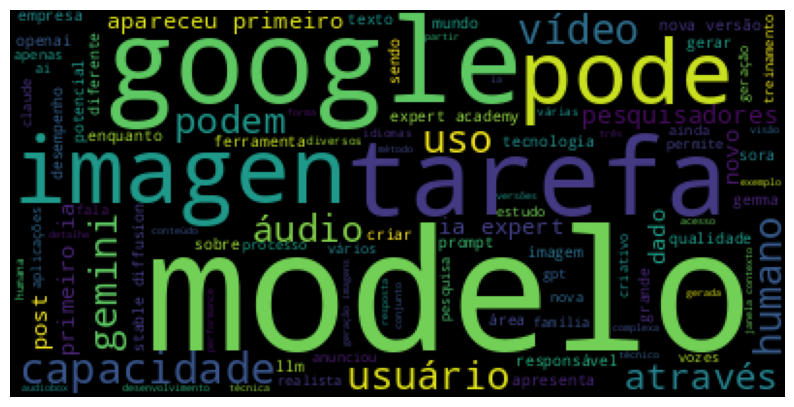

In [72]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(WordCloud().generate(conteudo_feed_formatado))

## Extração de entidades nomeadas

- Siglas: https://spacy.io/api/annotation#named-entities

In [73]:
import spacy

In [ ]:
!python -m spacy download pt

In [79]:
pln = spacy.load("pt_core_news_sm")
pln

In [80]:
documento = pln(conteudo_feed_formatado)

In [ ]:
from spacy import displacy
displacy.render(documento, style = 'ent', jupyter = True)

In [84]:
for entidade in documento.ents:
  if entidade.label_ == 'ORG':
    print(entidade.text, entidade.label_)

openai família ORG
google ORG
google ORG
seleção empresa ORG
google cloud ORG


## Sumarização de artigos de feed de notícias

In [ ]:
for artigo in artigos_blog:
  #print(artigo['titulo'])
  #print(artigo['conteudo'])
  sentencas_originais, melhores_sentencas, _ = sumarizar(artigo['conteudo'], 150, 10, 5)
  visualiza_resumo(artigo['titulo'], sentencas_originais, melhores_sentencas)
  #salva_resumo(artigo['titulo'], sentencas_originais, melhores_sentencas)

## Geração de arquivos HTML

In [92]:
def salva_resumo(titulo, lista_sentencas, melhores_sentencas):
  HTML_TEMPLATE = """<html>
    <head>
      <title>{0}</title>
      <meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
    </head>
    <body>{1}</body>

  </html>"""
  texto = ''
  for i in lista_sentencas:
    if i in melhores_sentencas:
      texto += str(i).replace(i, f"<mark>{i}</mark>")
    else:
      texto += i

  arquivo = open(os.path.join(titulo + '.html'), 'wb')
  html = HTML_TEMPLATE.format(titulo + ' - resumo', texto)
  arquivo.write(html.encode('utf-8'))
  arquivo.close()

## Solução para o exercício - lematização

In [94]:
pln = spacy.load("pt_core_news_sm")
pln

In [95]:
def preprocessamento_lematizacao(texto):
  texto = texto.lower()
  texto = re.sub(r" +", ' ', texto)

  documento = pln(texto)
  tokens = []
  for token in documento:
    tokens.append(token.lemma_)

  tokens = [palavra for palavra in tokens if palavra not in stopwords and palavra not in string.punctuation]
  texto_formatado = ' '.join([str(elemento) for elemento in tokens if not elemento.isdigit()])

  return texto_formatado

In [96]:
def sumarizar_lematizacao(texto, top_n_palavras, distancia, quantidade_sentencas):
  sentencas_originais = [sentenca for sentenca in nltk.sent_tokenize(texto)]
  sentencas_formatadas = [preprocessamento_lematizacao(sentenca_original) for sentenca_original in sentencas_originais]
  palavras = [palavra.lower() for sentenca in sentencas_formatadas for palavra in nltk.tokenize.word_tokenize(sentenca)]
  frequencia = nltk.FreqDist(palavras)
  top_n_palavras = [palavra[0] for palavra in frequencia.most_common(top_n_palavras)]
  notas_sentencas = calcula_nota_sentenca(sentencas_formatadas, top_n_palavras, distancia)
  melhores_sentencas = heapq.nlargest(quantidade_sentencas, notas_sentencas)
  melhores_sentencas = [sentencas_originais[i] for (nota, i) in melhores_sentencas]

  return sentencas_originais, melhores_sentencas, notas_sentencas

In [97]:
artigos_blog[0]['conteudo']

'No final de março, a OpenAI anunciou progressos na área da fala sintética, através da divulgação de um relatório preliminar sobre seu novo modelo, Voice Engine. Ao analisar grandes conjuntos de dados de fala humana, o modelo pode gerar áudio realista e expressivo de alta fidelidade, replicando diversos tons e emoções, com apenas 15 segundos de áudio para usar como referência.\n\n\n\nEssa tecnologia tem um enorme potencial para diversas aplicações, como o reporte deixa evidente através de várias iniciativas que aplicam a ferramenta. Notavelmente, oferece uma solução poderosa para pessoas com deficiências de fala, permitindo que elas se comuniquem com vozes únicas e não robóticas, que podem escolher para melhor se representarem. Além disso, a capacidade de gerar fala em vários idiomas com uma voz consistente abre portas para aplicações multilíngues, permitindo que comunicadores transfiram sua própria voz para idiomas que não dominam. Ainda é possível criar audiolivros ou materiais educa

In [98]:
sentencas_originais, melhores_sentencas, _ = sumarizar(artigos_blog[0]['conteudo'], 300, 5, 5)
visualiza_resumo(artigos_blog[0]['titulo'], sentencas_originais, melhores_sentencas)

In [99]:
sentencas_originais, melhores_sentencas, _ = sumarizar_lematizacao(artigos_blog[0]['conteudo'], 300, 5, 5)
visualiza_resumo(artigos_blog[0]['titulo'], sentencas_originais, melhores_sentencas)